In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(SpiecEasi)
library(igraph)
library(colorspace)
library(RColorBrewer)
library(ggpubr)
library(dunn.test)

In [12]:
ptero_e1_clusters = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/spiec_easi/cluster_files/csv_files/pteroskin_e1_topclusters.csv", header=TRUE)
ptero_e1_taxa = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/spiec_easi/cluster_files/csv_files/pteroskin_e1.10.tax.csv", header=TRUE)

In [13]:
ptero_e1_clustIDs.df = merge(ptero_e1_clusters, ptero_e1_taxa, by="OTUID", all.x=TRUE)

In [14]:
write.csv(ptero_e1_clustIDs.df, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/spiec_easi/cluster_files/csv_files/clustIDfiles/pteroskin_e0_clustIDs.csv")

In [15]:
ptero_e1_counts_by_phylum = ptero_e1_clustIDs.df %>%
    group_by(Cluster, phylum) %>%
    summarize(count = length(Cluster),
              proportion = count/length(count))
head(ptero_e1_counts_by_phylum)

ptero_e1_counts_by_class = ptero_e1_clustIDs.df %>%
    group_by(Cluster, class) %>%
    summarize(count = length(Cluster),
              proportion = count/length(count))
head(ptero_e1_counts_by_class)

Cluster,phylum,count,proportion
4,p__Acidobacteria,2,2
4,p__Actinobacteria,31,31
4,p__Bacteroidetes,5,5
4,p__Crenarchaeota,1,1
4,p__Firmicutes,16,16
4,p__Fusobacteria,3,3


Cluster,class,count,proportion
4,c__Acidobacteria-6,1,1
4,c__Actinobacteria,28,28
4,c__Alphaproteobacteria,13,13
4,c__Bacilli,9,9
4,c__Bacteroidia,2,2
4,c__Betaproteobacteria,7,7


In [16]:
write.csv(ptero_e1_counts_by_phylum, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/spiec_easi/cluster_files/csv_files/clustIDfiles/ptero_e1_counts_by_phylum.csv")
write.csv(ptero_e1_counts_by_class, "/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/spiec_easi/cluster_files/csv_files/clustIDfiles/ptero_e1_counts_by_class.csv")


##### (add proportion calculations by hand then read back in to jupyter notebook)


In [35]:
pteroskin_e1_clust = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/spiec_easi/cluster_files/csv_files/clustIDfiles/with_proportions/ptero_e1_counts_by_phylum.csv", header=TRUE)

In [36]:
cluster12 <- pteroskin_e1_clust[which(pteroskin_e1_clust$Cluster=='12'),]

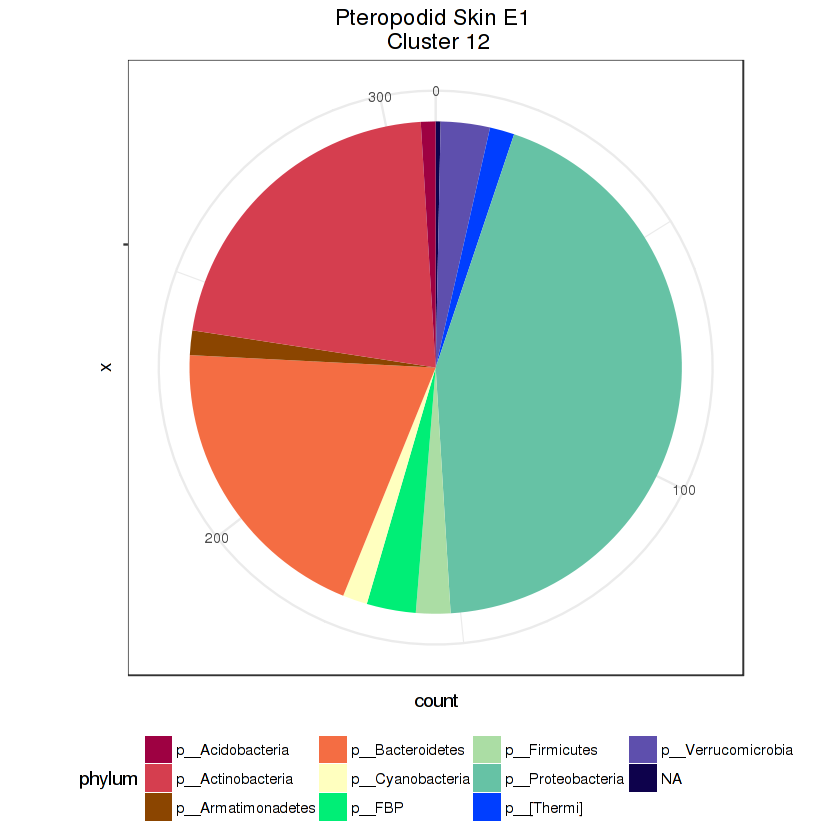

In [38]:
clust12 <- ggplot(cluster12, aes(x="", y=count, fill=phylum)) +
geom_bar(stat = "identity", width = 1) +
coord_polar("y", start=0) + 
labs(title="Pteropodid Skin E1 \n Cluster 12")

clust12 = clust12 + theme_bw() + theme(legend.position="bottom", plot.title = element_text(hjust = 0.5)) +

scale_fill_manual(values=c("#9E0142",
                               "#D53E4F",  
                               "#8B4500", 
                               "#F46D43", 
                               #"#C48E48", 
                               #"#FEE08C", 
                              "#FFFFBF",
                               #"#E6F598", Euryarchaeota
                               "#00EE76",
                               "#ABDDA4",
                               #"#007F00",
                               #"#486C35",
                               #"#00B200", Fusobacteria
                               #"#085E72",
                               "#66C2A5",
                               #"#008080",
                               #"#3288BD",
                               #"#00EEEE", TM7
                               "#003EFF",
                               "#5E4FAD"),                              
                      na.value= "#0E024C")

clust12

In [201]:
library(RColorBrewer)

In [39]:
clusters = read.csv("/group/gilbert-lab/Lutz/Batmicrobiome/batrun_finaldata_for_phyloseq_Oct2017/spiec_easi/cluster_files/csv_files/cluster_counts_total.csv", header=TRUE)


In [40]:
Hipposideros <- clusters[which(clusters$Host_Genus=='Hipposideros'),]
Miniopterus <- clusters[which(clusters$Host_Genus=='Miniopterus'),]
Rhinolophus <- clusters[which(clusters$Host_Genus=='Rhinolophus'),]
Pteropodid <- clusters[which(clusters$Host_Genus=='Pteropodid'),]

In [41]:
Ptero_E0 <- Pteropodid[which(Pteropodid$Ecto_status=='0'),]
Ptero_E1 <- Pteropodid[which(Pteropodid$Ecto_status=='1'),]

In [53]:
head(Pteropodid)

,Host_Genus,Ecto_status,network,clust_size,log10,ln
174,Pteropodid,0,ptero_e0,166,2.220108,2.220108
175,Pteropodid,0,ptero_e0,40,1.602060,1.602060
176,Pteropodid,0,ptero_e0,37,1.568202,1.568202
177,Pteropodid,0,ptero_e0,277,2.442480,2.442480
178,Pteropodid,0,ptero_e0,85,1.929419,1.929419
179,Pteropodid,0,ptero_e0,220,2.342423,2.342423


In [46]:
wilcox.test(clust_size ~ Ecto_status, data=Rhinolophus) 

Warning message in wilcox.test.default(x = c(23L, 395L, 107L, 334L), y = c(31L, :
“cannot compute exact p-value with ties”


	Wilcoxon rank sum test with continuity correction

data:  clust_size by Ecto_status
W = 64, p-value = 0.01903
alternative hypothesis: true location shift is not equal to 0


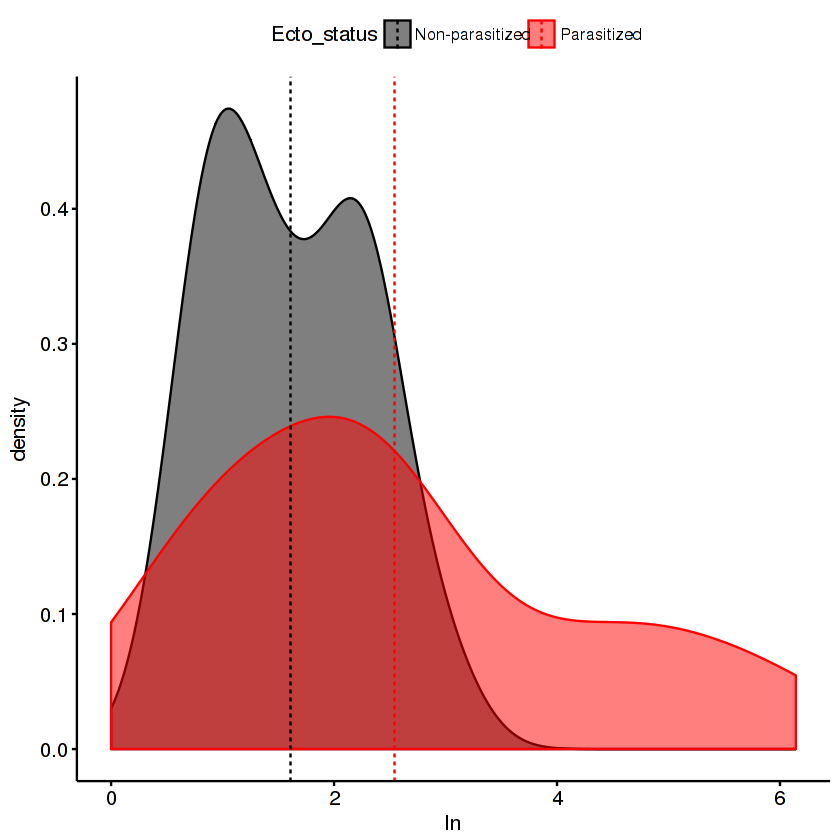

In [68]:
Pteropodid$Ecto_status <- factor(
     Pteropodid$Ecto_status)

p = ggdensity(Pteropodid, x = "ln", color = "Ecto_status", fill= "Ecto_status", add="mean", palette=c("black", "red"))
p

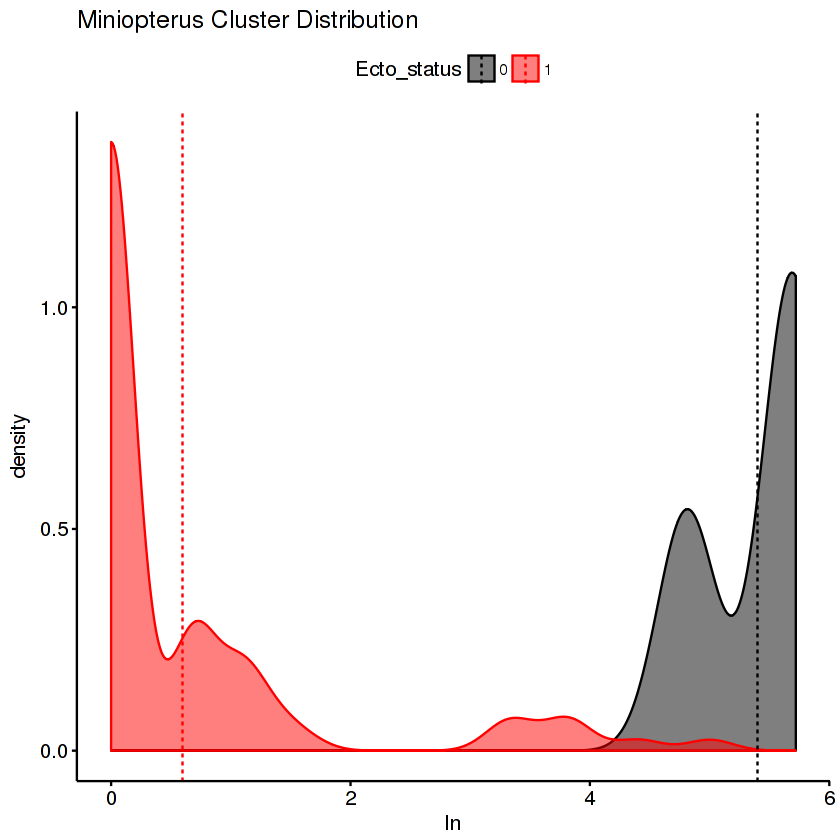

In [77]:
Miniopterus$Ecto_status = factor(Miniopterus$Ecto_status)

p2 = ggdensity(Miniopterus, x = "ln", color = "Ecto_status", title = "Miniopterus Cluster Distribution", fill= "Ecto_status", add="mean", palette=c("black", "red"))
p2

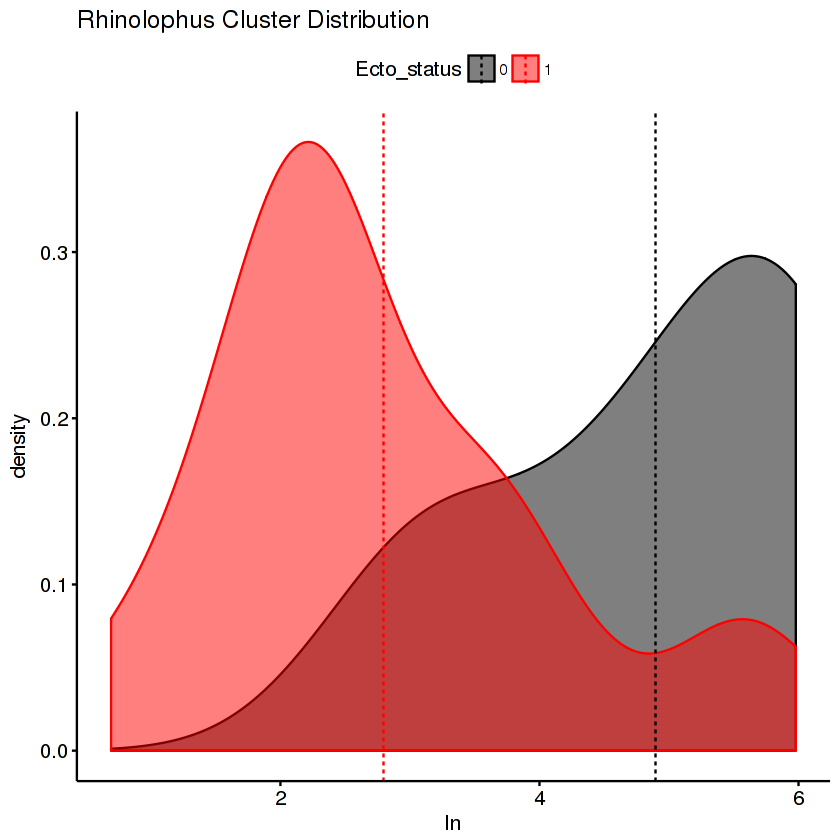

In [78]:
Rhinolophus$Ecto_status = factor(Rhinolophus$Ecto_status)

p3 = ggdensity(Rhinolophus, x = "ln", color = "Ecto_status", title = "Rhinolophus Cluster Distribution", fill= "Ecto_status", add="mean", palette=c("black", "red"))
p3

In [ ]:
Rousettus$Ecto_status = factor(Rousettus$Ecto_status)

p4 = ggdensity(Rousettus, x = "ln", color = "Ecto_status", title = "Rousettus Cluster Distribution", fill= "Ecto_status", add="mean", palette=c("black", "red"))
p4